In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [113]:
import pandas as pd

amazon_ratings = pd.read_csv('../data/train.csv')
amazon_ratings = amazon_ratings.dropna()

amazon_ratings.head()

,user_id,item_id,rating,timestamp
0,0,7314,5.0,1353612262000
1,0,15493,5.0,1370653034000
2,0,18817,4.0,1373668644000
3,0,18251,4.0,1373669469000
4,0,16199,1.0,1375136041000


In [114]:
amazon_ratings.info()

amazon_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543146 entries, 0 to 2543145
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int64  
 1   item_id    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 77.6 MB


,user_id,item_id,rating,timestamp
count,2.543146e+06,2.543146e+06,2.543146e+06,2.543146e+06
mean,4.338789e+05,2.840569e+04,4.038812e+00,1.467106e+12
std,2.509318e+05,1.796797e+04,1.365664e+00,8.242910e+10
min,0.000000e+00,0.000000e+00,1.000000e+00,9.565885e+11
25%,2.163772e+05,1.345100e+04,3.000000e+00,1.407054e+12
50%,4.337430e+05,2.493100e+04,5.000000e+00,1.453042e+12
75%,6.512078e+05,4.029700e+04,5.000000e+00,1.523213e+12
max,8.682170e+05,7.783200e+04,5.000000e+00,1.694398e+12


In [115]:
amazon_ratings.shape

(2543146, 4)

In [116]:
popular_products = pd.DataFrame(amazon_ratings.groupby('item_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
item_id,
20832,28303
12595,22787
12372,16378
6864,15428
33154,14792
13451,13007
7030,12306
24931,12188
18550,11628


<Axes: xlabel='item_id'>

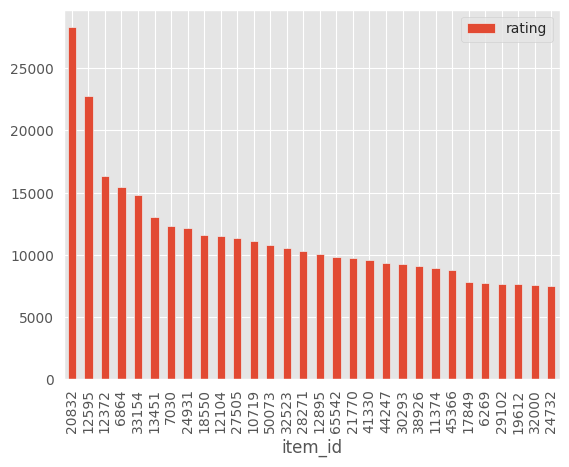

In [117]:
most_popular.head(30).plot(kind = "bar")

# Part 2

In [153]:
amazon_ratings1 = amazon_ratings.head(10000)

In [154]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='rating', index='user_id', columns='item_id', fill_value=0)
ratings_utility_matrix.head()

item_id,39,58,64,104,224,314,448,540,608,668,...,77678,77706,77718,77730,77761,77767,77775,77789,77821,77825
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
ratings_utility_matrix.shape

(16890, 11981)

In [155]:
X = ratings_utility_matrix.T
X.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346
item_id,,,,,,,,,,,,,,,,,,,,,
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
X.shape

(11981, 16890)

In [123]:
X1 = X

In [124]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(11981, 10)

In [125]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(11981, 11981)

In [126]:
X.index[99]

np.int64(1170)

In [127]:
i=3703

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

425

In [128]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(11981,)

In [129]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[17037, 27678, 71662]

In [130]:
# Part 3: User-Based Recommendation Function
# This function combines Part 1 (popularity-based) and Part 2 (collaborative filtering)
# to provide personalized recommendations for a given user ID

def get_user_recommendations(user_id, num_recommendations=10):
    """
    Recommend top products for a given user ID based on their purchase history
    and collaborative filtering techniques.
    
    Parameters:
    user_id (str): The user ID for whom to generate recommendations
    num_recommendations (int): Number of recommendations to return (default: 10)
    
    Returns:
    list: Top recommended product IDs
    """
    
    # Check if user exists in the dataset
    if user_id not in ratings_utility_matrix.index:
        # print(f"User {user_id} not found. Returning popular products for new users...")
        # Fall back to popularity-based recommendations (Part 1)
        return most_popular.head(num_recommendations).index.tolist()
    
    # Get user's purchase history
    user_ratings = ratings_utility_matrix.loc[user_id]
    purchased_products = user_ratings[user_ratings > 0].index.tolist()
    
    if len(purchased_products) == 0:
        # print(f"User {user_id} has no purchase history. Returning popular products...")
        return most_popular.head(num_recommendations).index.tolist()
    
    # print(f"User {user_id} has purchased {len(purchased_products)} products.")
    # print(f"Sample purchased products: {purchased_products[:3]}")

    # Get recommendations based on collaborative filtering (Part 2)
    recommendation_scores = {}
    
    for product in purchased_products:
        if product in X.index:
            # Find the index of the product in correlation matrix
            product_idx = list(X.index).index(product)
            
            # Get correlations for this product
            product_correlations = correlation_matrix[product_idx]
            
            # Add scores for correlated products
            for i, correlation in enumerate(product_correlations):
                recommended_product = X.index[i]
                
                # Skip products already purchased
                if recommended_product not in purchased_products:
                    if recommended_product not in recommendation_scores:
                        recommendation_scores[recommended_product] = 0
                    recommendation_scores[recommended_product] += correlation
    
    # Sort recommendations by score
    sorted_recommendations = sorted(recommendation_scores.items(), 
                                  key=lambda x: x[1], 
                                  reverse=True)
    
    # Extract top recommendations
    top_recommendations = [product for product, score in sorted_recommendations[:num_recommendations]]
    
    # If we don't have enough recommendations, fill with popular products
    if len(top_recommendations) < num_recommendations:
        popular_products_list = most_popular.index.tolist()
        for product in popular_products_list:
            if product not in top_recommendations and product not in purchased_products:
                top_recommendations.append(product)
                if len(top_recommendations) >= num_recommendations:
                    break
    
    return top_recommendations[:num_recommendations]

# Enhanced function with detailed analysis
def get_detailed_user_recommendations(user_id, num_recommendations=10):
    """
    Get detailed recommendations with analysis for a given user ID.
    
    Parameters:
    user_id (str): The user ID for whom to generate recommendations
    num_recommendations (int): Number of recommendations to return (default: 10)
    
    Returns:
    dict: Dictionary containing recommendations and analysis
    """
    
    result = {
        'user_id': user_id,
        'recommendations': [],
        'user_profile': {},
        'recommendation_method': ''
    }
    
    # Check if user exists
    if user_id not in ratings_utility_matrix.index:
        result['recommendation_method'] = 'popularity_based'
        result['recommendations'] = most_popular.head(num_recommendations).index.tolist()
        result['user_profile'] = {'status': 'new_user', 'purchase_count': 0}
        return result
    
    # Analyze user profile
    user_ratings = ratings_utility_matrix.loc[user_id]
    purchased_products = user_ratings[user_ratings > 0]
    
    result['user_profile'] = {
        'status': 'existing_user',
        'purchase_count': len(purchased_products),
        'average_rating': purchased_products.mean(),
        'purchased_products': purchased_products.index.tolist()
    }
    
    if len(purchased_products) == 0:
        result['recommendation_method'] = 'popularity_based'
        result['recommendations'] = most_popular.head(num_recommendations).index.tolist()
        return result
    
    # Collaborative filtering recommendations
    result['recommendation_method'] = 'collaborative_filtering'
    result['recommendations'] = get_user_recommendations(user_id, num_recommendations)
    
    return result

# Example usage function
def demonstrate_recommendations():
    """
    Demonstrate the recommendation system with sample users
    """
    # Get a few sample user IDs from the dataset
    sample_users = ratings_utility_matrix.index[:5].tolist()
    
    print("=== Product Recommendation System Demo ===\n")
    
    for user_id in sample_users:
        print(f"Recommendations for User: {user_id}")
        print("-" * 50)
        
        recommendations = get_detailed_user_recommendations(user_id)
        
        print(f"User Status: {recommendations['user_profile']['status']}")
        print(f"Purchase Count: {recommendations['user_profile']['purchase_count']}")
        print(f"Recommendation Method: {recommendations['recommendation_method']}")
        print(f"Top 10 Recommendations: {recommendations['recommendations']}")
        print("\n")

In [131]:
get_user_recommendations(3)

[np.int64(22991),
 np.int64(42622),
 np.int64(38285),
 np.int64(17979),
 np.int64(44221),
 np.int64(8468),
 np.int64(12539),
 np.int64(28872),
 np.int64(29989),
 np.int64(35976)]

In [132]:
test_users = pd.read_csv('../data/test.csv')
# fill predictions with results of get_user_recommendations(3)

predictions = []

for user_id in test_users['user_id'].tolist():
    prediction = get_user_recommendations(user_id)
    final_prediction = []
    for item_id in prediction:
        final_prediction.append(int(item_id))
    predictions.append(final_prediction)

submission = pd.DataFrame({
    'user_id': test_users['user_id'].tolist(), 
    'predictions': [' '.join(map(str, pred)) for pred in predictions]
})
submission.to_csv("submission.csv", index=False)
print(f"Submission saved: {submission.shape[0]:,} predictions")


KeyboardInterrupt: 

# Part 3

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [135]:
product_descriptions = pd.read_csv('../data/item_metadata_filtered.csv')
product_descriptions.shape

(77833, 15)

In [136]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape

(48333, 15)

In [137]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]
product_descriptions1["description"].head(10)


6                                                    []
12    ['Your feet go through so much every day and h...
16    ["Clear Essence Specialist Skincare Body Oil i...
17    ['African Pride Black Castor Miracle Hold & Co...
30                                                   []
31                                                   []
33    ["Body Fantasies Signature Vanilla by Parfums ...
35    ['MoYo Natural Labs SPRAY BOTTLE 8 OZ HDPE pla...
37                                                   []
39                                                   []
Name: description, dtype: object

In [138]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["description"])
X1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8473 stored elements and shape (500, 3717)>

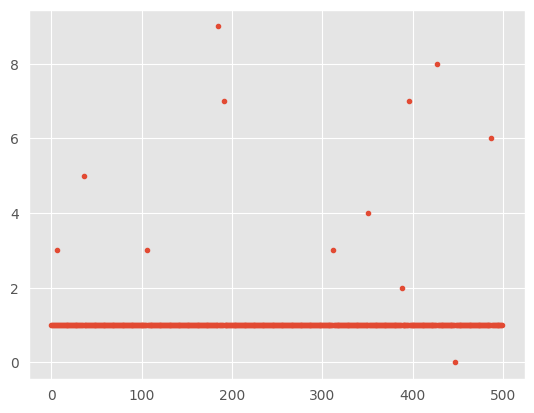

In [139]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter=1000000, n_init=100)
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

best k = 13  (silhouette = 0.421)


/home/xowski22/PycharmProjects/Team_4_DSC/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/xowski22/PycharmProjects/Team_4_DSC/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


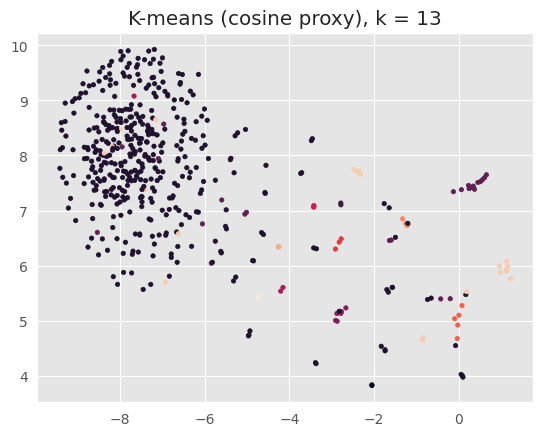

In [140]:
# -----------------------------------------------------------
# 1.  Vectorise and put every document on the unit sphere
# -----------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import umap.umap_ as umap
import numpy as np
import pandas as pd      # only for convenience; can omit

# ── load / prepare your text column ─────────────────────────
texts = product_descriptions1["description"].fillna("").tolist()

vec = TfidfVectorizer(stop_words="english", min_df=3)
X   = vec.fit_transform(texts)          # sparse (n_samples × n_terms)

# L2-normalise so that ||row||₂ = 1  →  cosine ∝ Euclidean
X_unit = normalize(X, norm="l2", copy=False)

# -----------------------------------------------------------
# 2.  Reduce dimensionality with truncated SVD (LSA)
# -----------------------------------------------------------
svd = TruncatedSVD(n_components=100, random_state=0)
X_red = svd.fit_transform(X_unit)       # dense (n_samples × 100)

# -----------------------------------------------------------
# 3.  Pick the optimal k by silhouette on the reduced space
# -----------------------------------------------------------
k_range = range(2, 15)
sil_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=0)
    labels = km.fit_predict(X_red)
    sil_scores.append(silhouette_score(X_red, labels))

best_k = k_range[int(np.argmax(sil_scores))]
print(f"best k = {best_k}  (silhouette = {max(sil_scores):.3f})")

# -----------------------------------------------------------
# 4.  Final K-means with the chosen k
# -----------------------------------------------------------
kmeans  = KMeans(n_clusters=best_k, init="k-means++", n_init=50, random_state=0)
labels  = kmeans.fit_predict(X_red)

# optional: renormalise centroids (keeps them on the unit sphere)
kmeans.cluster_centers_ = normalize(kmeans.cluster_centers_, norm="l2")

# -----------------------------------------------------------
# 5.  2-D visualisation with UMAP
# -----------------------------------------------------------
embedding = umap.UMAP(random_state=0).fit_transform(X_red)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=10)
plt.title(f"K-means (cosine proxy), k = {best_k}")
plt.show()

In [141]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [142]:
# # Optimal clusters is 

true_k = 10

# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
# model.fit(X1)

print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 150
 18
 50
 15
 blended
 added
 african
 base
 assorted
 aloe
Cluster 1:
 10
 20
 35
 acid
 alloy
 60
 bar
 blades
 18
 alcohol
Cluster 2:
 18
 12
 40
 97
 alcohol
 150
 acids
 28
 35
 10
Cluster 3:
 10
 100
 100ml
 14
 28
 24
 150
 allow
 applying
 97
Cluster 4:
 14
 15
 10
 40
 allow
 50
 adhesive
 applying
 avoid
 25
Cluster 5:
 adults
 amber
 75
 accessory
 25
 applicator
 adhesive
 absorbed
 10
 28
Cluster 6:
 24
 16
 28
 15
 60
 acid
 achieve
 accessory
 action
 40
Cluster 7:
 50
 18
 achieve
 ages
 28
 aging
 10
 60
 30
 adult
Cluster 8:
 10
 100ml
 accessory
 30
 15
 100
 60
 25
 action
 accessories
Cluster 9:
 12
 10
 14
 50
 16
 achieve
 adhesive
 add
 avoid
 beautiful


In [143]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vec.transform([product])
    Y_unit = normalize(Y, norm="l2", copy=False)
    Y_red = svd.transform(Y_unit)

    prediction = kmeans.predict(Y_red)
    #print(prediction)
    print_cluster(prediction[0])

In [144]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [145]:
show_recommendations("blue whale")

Cluster 11:
 10
 100ml
 14
 150
 absorbed
 acids
 added
 accessories
 action
 30


In [150]:
def hybrid_cf_popularity(user_id, num_recommendations=10):

    collab_recs = get_user_recommendations(user_id, num_recommendations * 2)
    popular_recs = most_popular.head(num_recommendations * 2).index.tolist()

    recommendation_scores = {}

    for i, product in enumerate(collab_recs):
        score = (len(collab_recs) - i) / len(collab_recs) * 0.6
        recommendation_scores[product] = recommendation_scores.get(product, 0) + score

    for i, product in enumerate(popular_recs):
        score = (len(popular_recs) - i) / len(popular_recs) * 0.4
        recommendation_scores[product] = recommendation_scores.get(product, 0) + score

    final_recs = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)
    return [product for product, score in final_recs[:num_recommendations]]

In [152]:
test_users = pd.read_csv('../data/test.csv')
predictions = []

print(f"Generating CF+Popularity predictions for {len(test_users)} users...")

for i, user_id in enumerate(test_users['user_id'].tolist()):
    hybrid_recs = hybrid_cf_popularity(user_id, 10)

    # Convert to integers
    final_prediction = []
    for item_id in hybrid_recs:
        try:
            final_prediction.append(int(item_id))
        except:
            continue

    # Fill with popular products if needed
    while len(final_prediction) < 10:
        for popular_item in most_popular.index:
            if int(popular_item) not in final_prediction:
                final_prediction.append(int(popular_item))
                break

    predictions.append(final_prediction[:10])

    # # Progress
    # if (i + 1) % 250 == 0:
    #     print(f"Progress: {i + 1}/{len(test_users)}")

final_submission = pd.DataFrame({
    'user_id': test_users['user_id'].tolist(),
    'predictions': [' '.join(map(str, pred)) for pred in predictions]
})

final_submission.to_csv("final_submission.csv", index=False)
print(f"\nFinal submission saved!")
print(f"File: final_submission.csv")
print(f"Shape: {final_submission.shape}")

Generating CF+Popularity predictions for 412461 users...

Final submission saved!
File: final_submission.csv
Shape: (412461, 2)
